**Mixalis Nikitaras**  
# Computational Dynamics, Astrodynamics and Applications
## Exercise 2
### Task 3

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
#Cartesian Elements to Keplerian
def car2kep(car,GM):
    #This function takes input cartesian coordinates (x,y,z) and velocities (vx,vy,vz) in ECI as well as GM of orbit
    #and returns keplerian orbital elements kep=(a,e).
    x,y,vx,vy=car
    
    r_vec=[x,y]
    r=np.linalg.norm(r_vec)
    v_vec=[vx,vy]
    v=np.linalg.norm(v_vec)
    Energy=0.5*v**2 - GM/r
    a=-GM/(2*Energy)
    rv=np.dot(r_vec,v_vec)
    e1=(v**2/GM - 1/r)*x - rv/GM*vx
    e2=(v**2/GM - 1/r)*y - rv/GM*vy
    
    e_vec=[e1,e2]
    e=np.linalg.norm(e_vec)
    
    return [a,e]


In [3]:
#Define System of Differential Equations not considering Earth's shadow
def rhs_2bp_pert_ns(t,X):
    x,y,vx,vy=X
    mu=3.986 *10**(14) #m^3/s^2
    S=8000 #m^2
    Cd=1.5
    Solar_Constant=1367 #W/m^2
    n=np.deg2rad(1)/(24*3600)
    m_sat=400000 #kg
    r=np.sqrt(x**2+y**2)
    r_vec=[x,y]
    r3=r*r*r
    v=np.sqrt(vx**2+vy**2)
    x_dot=vx
    y_dot=vy
    AU= 149*10^9 #m
    xs=AU*np.cos(n*t) 
    ys=AU*np.sin(n*t) 
    rs=[xs,ys]
    
    no_sh=1
    temp=-(no_sh*Solar_Constant*Cd*S/(c*m_sat))
    dist=np.sqrt((x-xs)**2+(y-ys)**2)
    px=temp*(x-xs)/dist 
    py=temp*(y-ys)/dist 

    vx_dot=-mu*x/r3 + px
    vy_dot=-mu*y/r3 + py
    
    return [x_dot,y_dot,vx_dot,vy_dot]

In [4]:
#Define System of Differential Equations considering Earth's shadow
def rhs_2bp_pert_ws(t,X):
    x,y,vx,vy=X
    mu=3.986 *10**(14) #m^3/s^2
    S=8000 #m^2
    Cd=1.5
    Solar_Constant=1367 #W/m^2
    n=np.deg2rad(1)/(24*3600)
    m_sat=400000 #kg
    r=np.sqrt(x**2+y**2)
    r_vec=[x,y]
    r3=r*r*r
    v=np.sqrt(vx**2+vy**2)
    x_dot=vx
    y_dot=vy
    AU= 149*10^9 #m
    xs=AU*np.cos(n*t) 
    ys=AU*np.sin(n*t) 
    rs=[xs,ys]
    
    AB=(r**2-(np.inner(rs,r_vec)/np.sqrt(xs**2+ys**2))**2)**(1/2)
    
    if AB<rearth and np.inner(r_vec,np.array(rs))<0: #συνθήκη για το αν ο δορυφόρος είναι στη σκιά της Γης
        shadow=0
    else:
        shadow=1
    
    
    temp=-(shadow*Solar_Constant*Cd*S/(c*m_sat))
    dist=np.sqrt((x-xs)**2+(y-ys)**2)
    px=temp*(x-xs)/dist 
    py=temp*(y-ys)/dist 

    vx_dot=-mu*x/r3 + px
    vy_dot=-mu*y/r3 + py
    
    return [x_dot,y_dot,vx_dot,vy_dot]


In [5]:
#Parameter Initialization
t0=0 #Integration lower limit
rearth=6371*10**3 #Earth Radius in meters
mu=3.986 *10**(14) #Earth mu in m^3/s^2
H1=400*10**3 #Satellite's initial height in meters
x0=0 #Satellite's initial x position in meters
y0=rearth+H1 #Satellite's initial y position in meters
c=2.99*10**8 #Light speed in m/s
r0=np.sqrt(x0**2 + y0**2) #Initial orbit radius
vc=np.sqrt(mu/r0) #Initial speed of satellite
vx0=-vc 
vy0=0 
T=2*np.pi/vc*(rearth+H1) #Orbit Period of Satellite
tmax=6000*T #Integration higher limit
ICCAR=[x0,y0,vx0,vy0] #Initial Conditions in Cartesian

In [6]:
#Integrating the satellite's orbit not considering Earth's shadow
sol=solve_ivp(rhs_2bp_pert_ns,[t0,tmax],ICCAR,t_eval=np.linspace(0,tmax,50000),method='DOP853',atol=1e-10,rtol=1e-10)

In [7]:
#Integrating the satellite's orbit considering Earth's shadow
sol2=solve_ivp(rhs_2bp_pert_ws,[t0,tmax],ICCAR,t_eval=np.linspace(0,tmax,50000),method='DOP853',atol=1e-10,rtol=1e-10)

In [8]:
#Transform cartesian coordinates to keplerian elements (a,e)
kep=np.zeros((2,np.size(sol.t)))
for i in range(len(sol.t)):
    kep[:,i]=car2kep(sol.y[:,i],mu)

kep2=np.zeros((2,np.size(sol.t)))
for i in range(len(sol.t)):
    kep2[:,i]=car2kep(sol2.y[:,i],mu)

Text(0.5, 1.0, "Eccentricity - Time considering Earth's shadow  ")

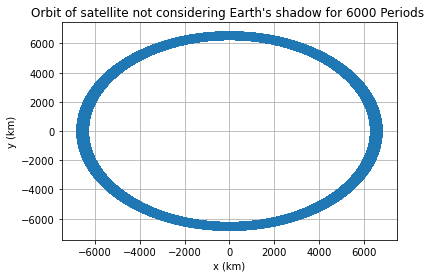

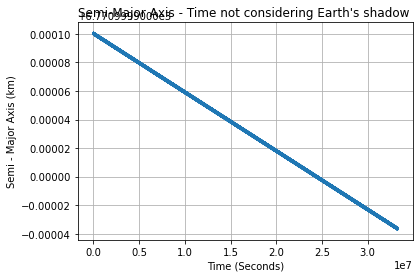

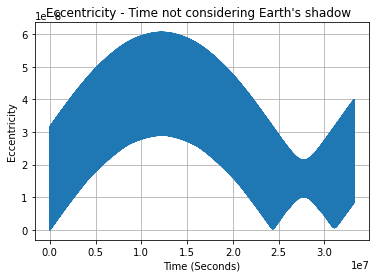

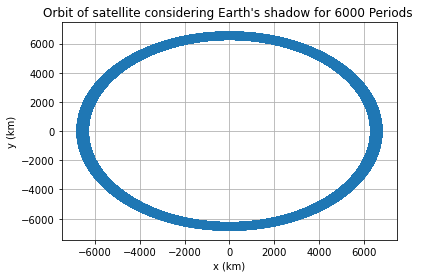

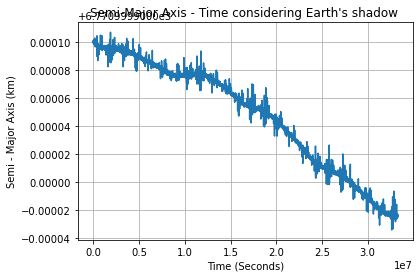

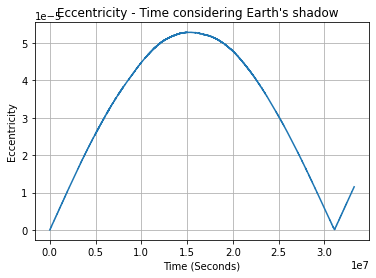

In [9]:
#Plotting the figures 
plt.figure(0)
plt.plot(sol.y[0]/10**3,sol.y[1]/10**3)

plt.figure(1)
plt.plot(sol.t,kep[0]/10**3)

plt.figure(2)
plt.plot(sol.t,kep[1])

plt.figure(3)
plt.plot(sol2.y[0]/10**3,sol2.y[1]/10**3)

plt.figure(4)
plt.plot(sol2.t,kep2[0]/10**3)

plt.figure(5)
plt.plot(sol2.t,kep2[1])

# Figure 0 Settings
plt.figure(0)
plt.xlabel("x (km)")
plt.ylabel("y (km)")
plt.grid()
plt.title('Orbit of satellite not considering Earth\'s shadow for 6000 Periods ')

# Figure 1 Settings
plt.figure(1)
plt.xlabel('Time (Seconds)')
plt.ylabel('Semi - Major Axis (km)')
plt.grid()
plt.title('Semi-Major Axis - Time not considering Earth\'s shadow ')


# Figure 2 Settings
plt.figure(2)
plt.xlabel('Time (Seconds)')
plt.ylabel('Eccentricity')
plt.grid()
plt.title('Eccentricity - Time not considering Earth\'s shadow  ')


# Figure 3 Settings
plt.figure(3)
plt.xlabel("x (km)")
plt.ylabel("y (km)")
plt.grid()
plt.title('Orbit of satellite considering Earth\'s shadow for 6000 Periods ')


# Figure 4 Settings
plt.figure(4)
plt.xlabel('Time (Seconds)')
plt.ylabel('Semi - Major Axis (km)')
plt.grid()
plt.title('Semi-Major Axis - Time considering Earth\'s shadow ')

# Figure 5 Settings
plt.figure(5)
plt.xlabel('Time (Seconds)')
plt.ylabel('Eccentricity')
plt.grid()
plt.title('Eccentricity - Time considering Earth\'s shadow  ')

### Conclusions
In this script our goal is to numerically integrate the differential equations of a satellite in cartesian coordinates  
The system is considered pertrubed from the solar radiation pressure.  
The integration time span is 6000 orbital periods.  
The movement of the sun is considered circular with ω=1deg/day.  
In the first part we integrate ignoring the effect Earth's shadow has in the process (without Earth's shadow).  
In the second part we integrate considering the effect Earth's shadow has in the process (with Earth's shadow).  
For each part, we plot the orbit of the satellite as well as the a(t), e(t),
where a is the semi major axis of the orbit and e its eccentricity.  
As we observe from the figures above, in both cases the effect solar radiation pressure has in the orbit of the satellite is miniscule in both parts for 6000 orbital periods. 